In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configuración de visualización
%matplotlib inline
sns.set(style="whitegrid")

In [3]:
# Cargar los datos
books_df = pd.read_csv('Books.csv')
users_df = pd.read_csv('Users.csv')
ratings_df = pd.read_csv('Ratings.csv')

C:\Users\Gamer\AppData\Local\Temp\ipykernel_21436\1719939682.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv('Books.csv')


In [4]:
# Revisar las primeras filas de cada dataframe
print("Books Dataframe:")
print(books_df.head())
print("\nUsers Dataframe:")
print(users_df.head())
print("\nRatings Dataframe:")
print(ratings_df.head())

Books Dataframe:
         ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://i

In [5]:
# Descripción estadística de los dataframes
print("\nEstadísticas Descriptivas de Libros:")
print(books_df.describe())
print("\nEstadísticas Descriptivas de Usuarios:")
print(users_df.describe())
print("\nEstadísticas Descriptivas de Calificaciones:")
print(ratings_df.describe())


Estadísticas Descriptivas de Libros:
              ISBN      Book-Title      Book-Author  Year-Of-Publication  \
count       271360          271360           271359               271360   
unique      271360          242135           102023                  202   
top     0195153448  Selected Poems  Agatha Christie                 2002   
freq             1              27              632                13903   

        Publisher                                        Image-URL-S  \
count      271358                                             271360   
unique      16807                                             271044   
top     Harlequin  http://images.amazon.com/images/P/185326119X.0...   
freq         7535                                                  2   

                                              Image-URL-M  \
count                                              271360   
unique                                             271044   
top     http://images.amazon.com/imag

In [6]:
# Revisión de valores nulos
print("\nValores Nulos en Libros:")
print(books_df.isnull().sum())
print("\nValores Nulos en Usuarios:")
print(users_df.isnull().sum())
print("\nValores Nulos en Calificaciones:")
print(ratings_df.isnull().sum())


Valores Nulos en Libros:
ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

Valores Nulos en Usuarios:
User-ID          0
Location         0
Age         110762
dtype: int64

Valores Nulos en Calificaciones:
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


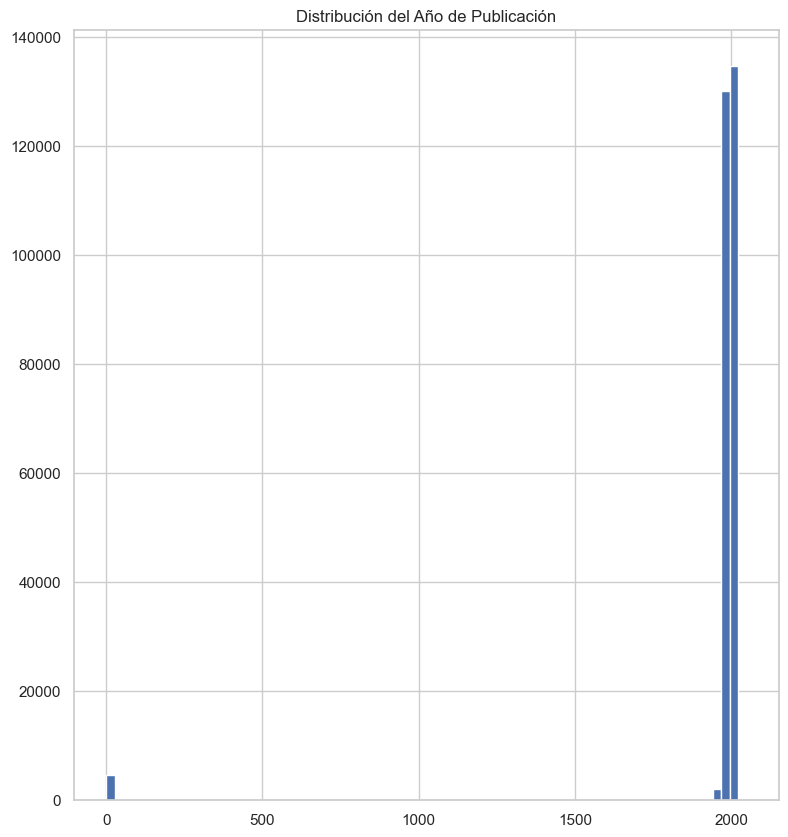

In [7]:
# Convertir 'Year-Of-Publication' a numérico y manejar los valores no numéricos
books_df['Year-Of-Publication'] = pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')

# Reemplazar los NaN con algún valor o eliminarlos
books_df.dropna(subset=['Year-Of-Publication'], inplace=True)

# Limpiar columna
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
books_df['Year-Of-Publication'].hist(bins=75)
plt.title('Distribución del Año de Publicación')
plt.show()

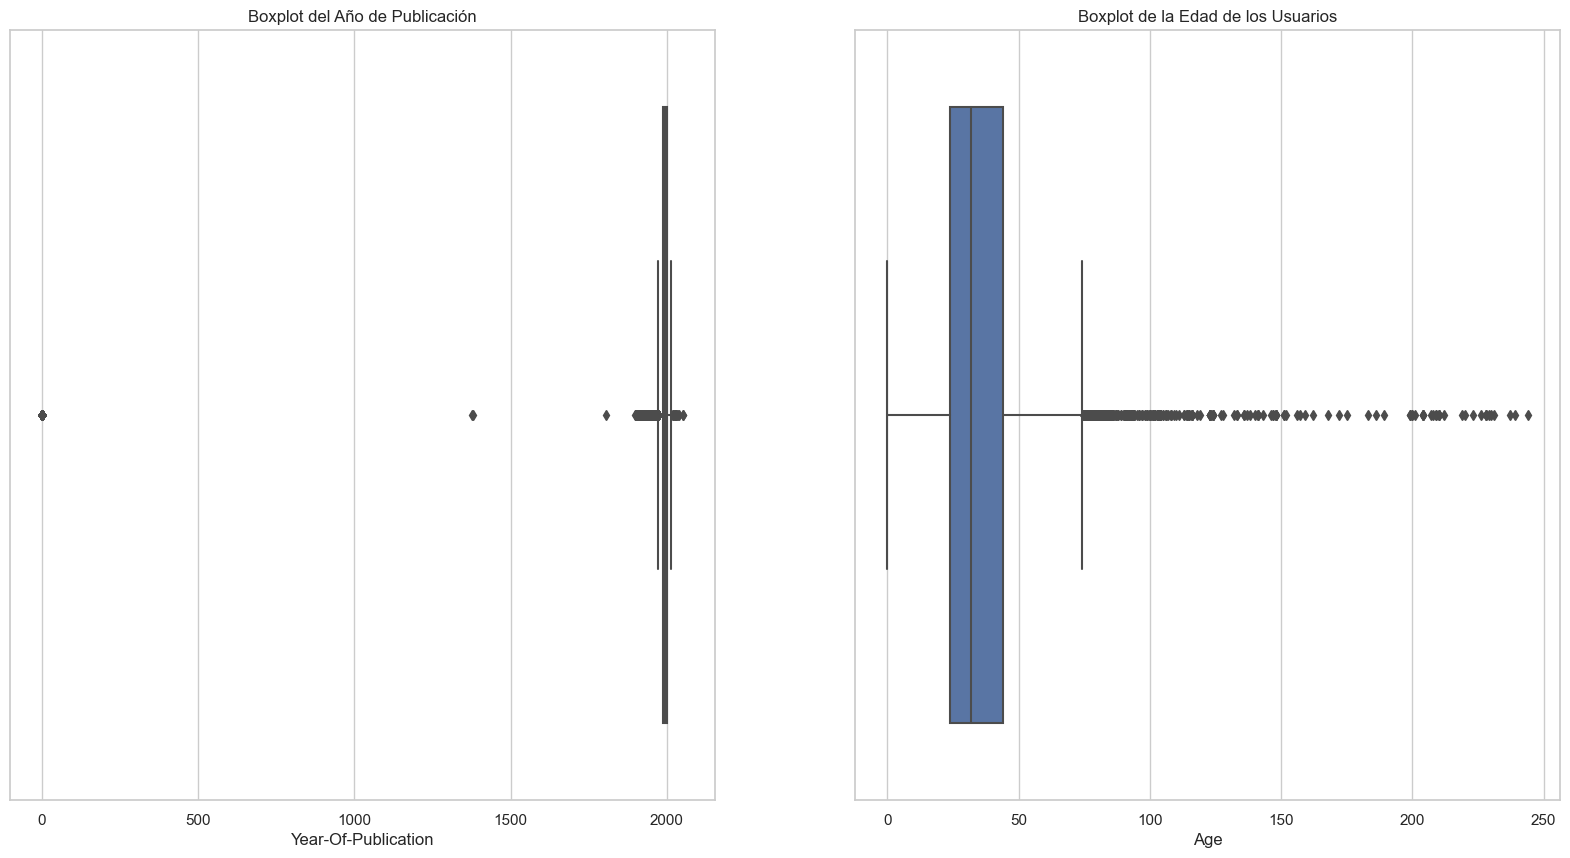

In [8]:
# Boxplots para visualizar outliers
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.boxplot(x=books_df['Year-Of-Publication'])
plt.title('Boxplot del Año de Publicación')

plt.subplot(1, 2, 2)
sns.boxplot(x=users_df['Age'])
plt.title('Boxplot de la Edad de los Usuarios')
plt.show()

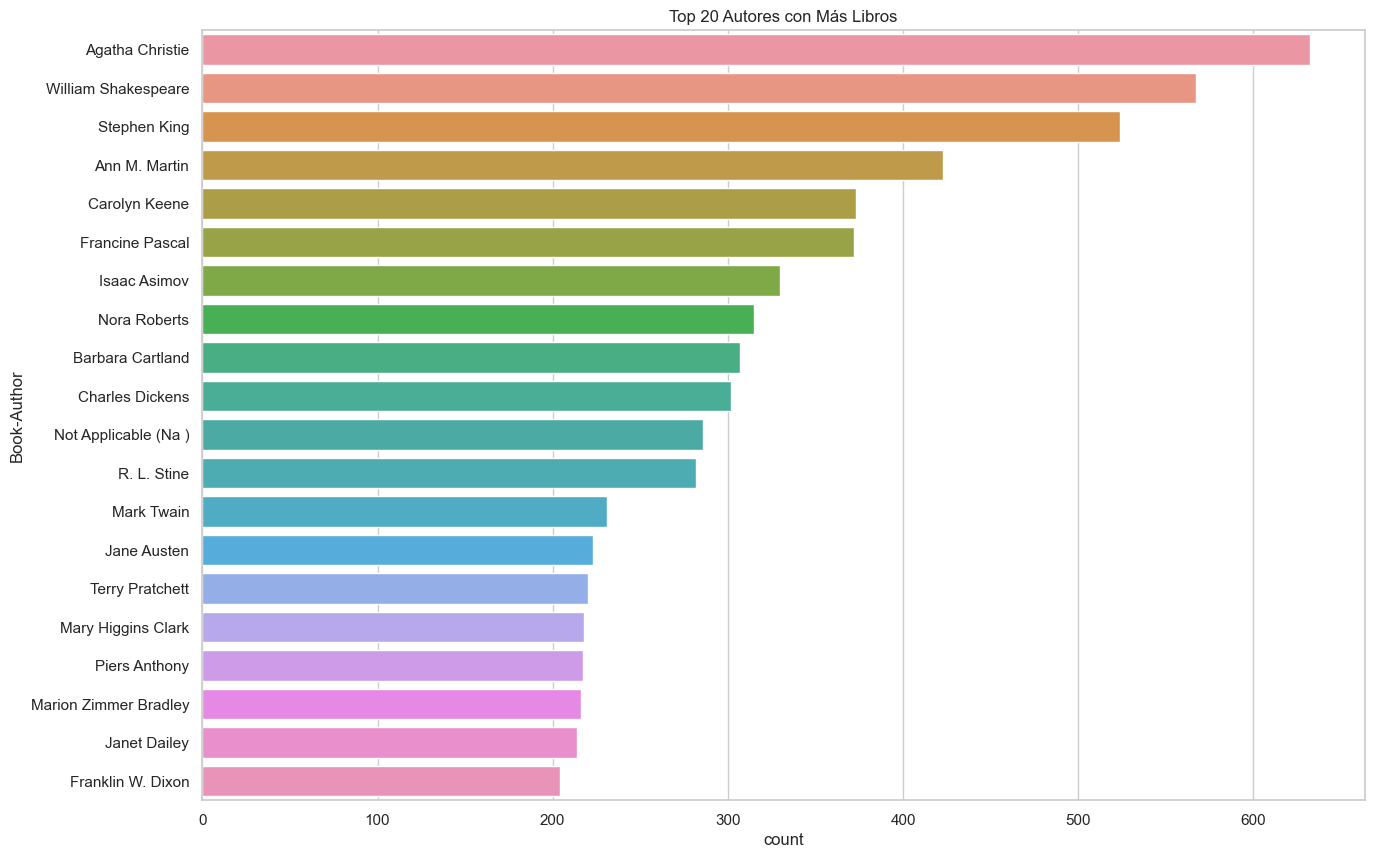

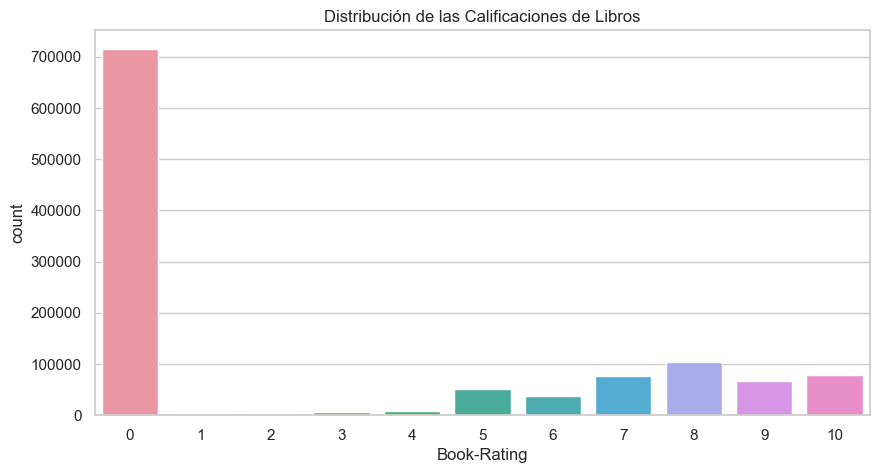

In [9]:
# Gráficos de barras para datos categóricos (top 20)
plt.figure(figsize=(15,10))
sns.countplot(y='Book-Author', data=books_df, order=books_df['Book-Author'].value_counts().head(20).index)
plt.title('Top 20 Autores con Más Libros')
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x='Book-Rating', data=ratings_df)
plt.title('Distribución de las Calificaciones de Libros')
plt.show()

In [10]:
users_df['Country'] = users_df['Location'].apply(lambda x: x.split(',')[-1].strip())

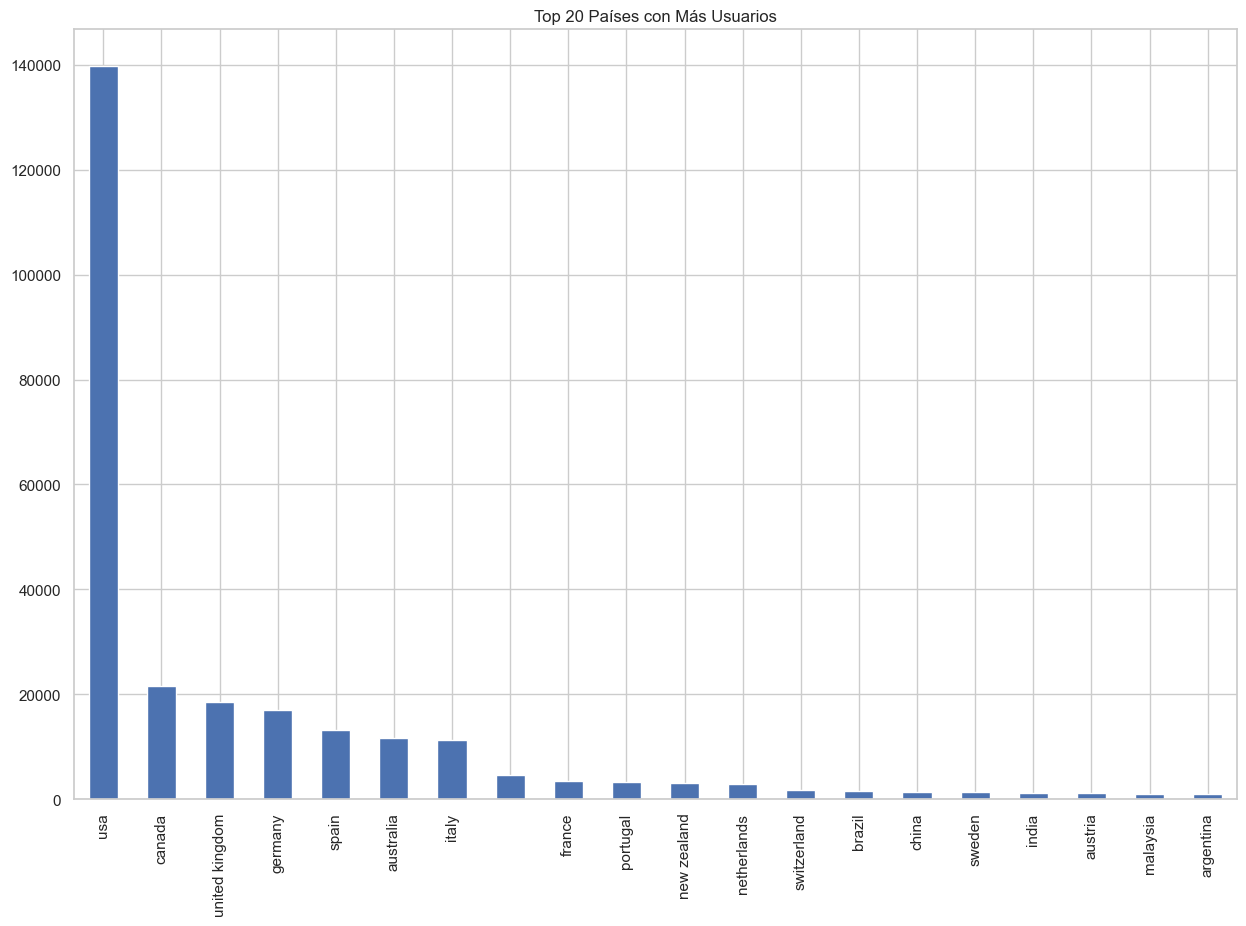

In [11]:
# Top 20 países
plt.figure(figsize=(15,10))
users_df['Country'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Países con Más Usuarios')
plt.show()

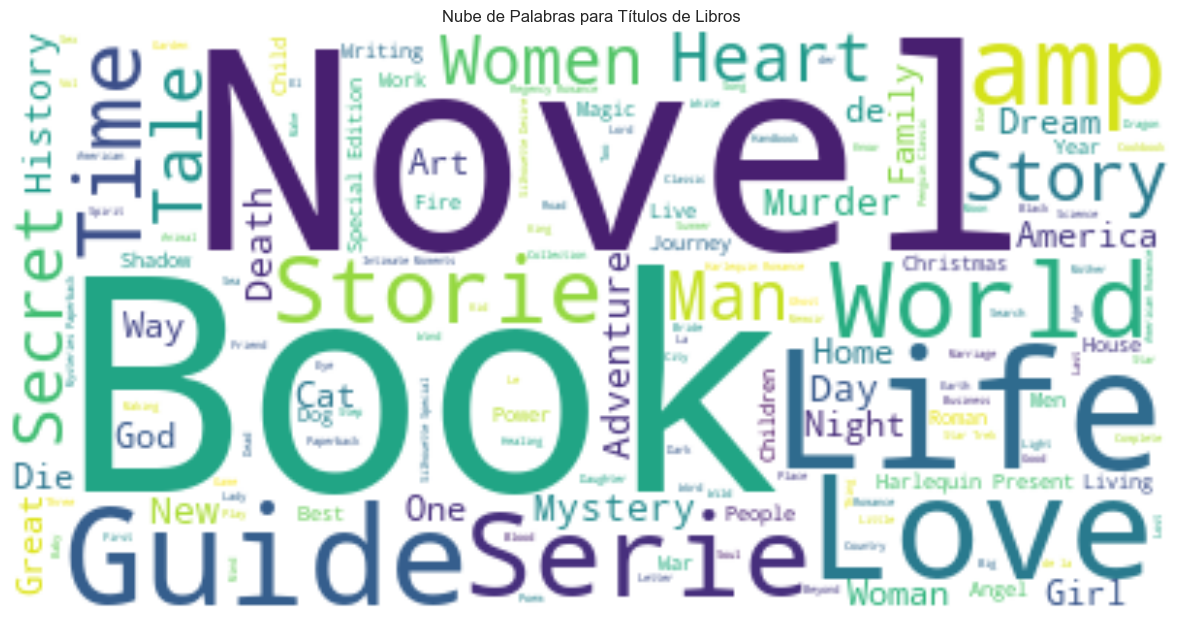

In [12]:
# Análisis de palabras más comunes en títulos de libros
from wordcloud import WordCloud
plt.figure(figsize=(15,10))
wordcloud = WordCloud(background_color='white', max_words=200).generate(' '.join(books_df['Book-Title']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras para Títulos de Libros')
plt.show()

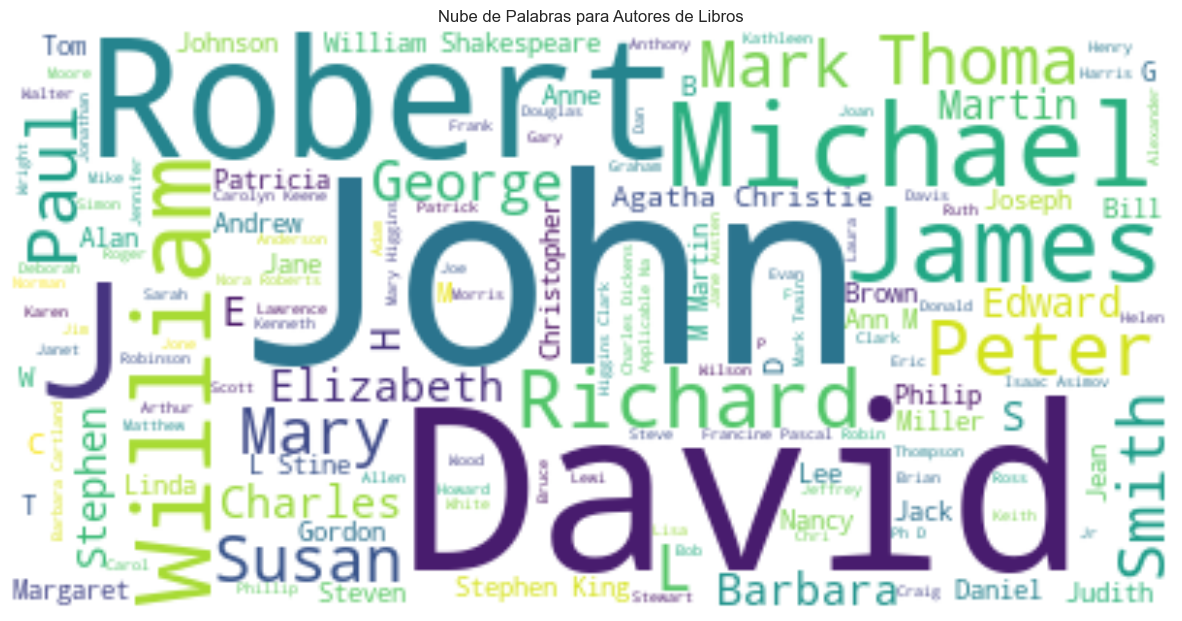

In [13]:
# Convertir toda la columna 'Book-Author' a strings
books_df['Book-Author'] = books_df['Book-Author'].astype(str)

# Generar y mostrar la nube de palabras
wordcloud = WordCloud(background_color='white', max_words=200).generate(' '.join(books_df['Book-Author']))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras para Autores de Libros')
plt.show()